#  <span style="">  고양이 수염 스티커 만들기</span>

In [26]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


# <span style=""> 1.이미지 불러오기

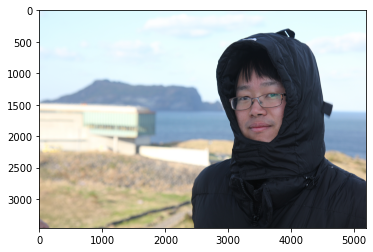

In [27]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BRG > RGB로 변경
plt.imshow(img_rgb)
plt.show()

# <span style=""> 2.얼굴 검출

In [29]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [30]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(2960, 1150) (3918, 2108)]]


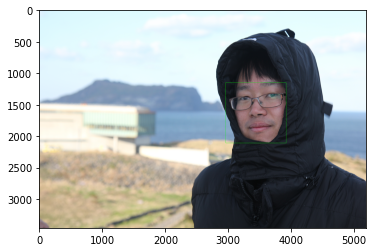

In [31]:
# 찾은 얼굴 영역 박스 리스트

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# <span style=""> 3.랜드마크 지정

In [32]:
#dlib에서 제공되는 weighte file 사용해 landmark모델 저장
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [33]:
list_landmarks = []
#landmark_predictor은 RGB이미지와 dlib.rectangle 받아서 dlib.full_object_detection반환
# 얼굴 영역 박스 마다 face landmark를 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) #RGB이미지와 dlib.rectangle 받음
    # face landmark 좌표를 저장
     #map으로 points를 만들고, append이용해 리스트에 추가
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


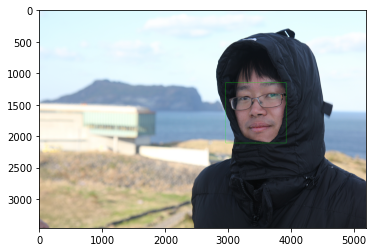

In [34]:
#랜드마크를 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

<span style=""> 문제점
    
    랜드마크가 나타나지 않음  
    오류인줄 알고 여러시간 수정했으나 마찬가지  
    퍼실님께 질문을 하여 사진이 고해상도라서 랜드마크가 있지만 눈에 보이지 않는다는 답을 알게 되었음 

<span style=""> 해결방법
    
    랜드마크가 이미지에 비해 너무 작게 보여 눈에 보이지 않으므로
    cv2.circle(img_show, point, 2, (0, 255, 255), -1)
    랜드마크 크기를 2에서 10으로 수정해봄

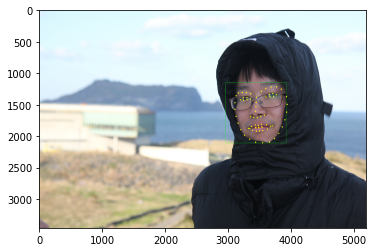

In [35]:
#랜드마크를 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# <span style=""> 4.고양이 스티커 적용

In [36]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코끝 index는 33
    x = landmark[33][0]  # 코끝 x좌표값
    y = landmark[33][1]  # 코끝 y좌표값
    w = h = dlib_rect.width() # 경계박스 너비
    print ('(x,y) : (%d,%d)'%(x,y))  # (x,y) : (3458,1706)
    print ('(w,h) : (%d,%d)'%(w,h))  # (w,h) : (959,959)

(3458, 1706)
(x,y) : (3458,1706)
(w,h) : (959,959)


In [37]:
# 고양이 수염 이미지 불러오기 및  resize하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h)) # 경계박스 크기에 맞게 resize
print (img_sticker.shape)

(959, 959, 3)


In [38]:
#이미지에서 스티커 좌표 설정
# 수염 이미지의 시작점은 x = x_코끝 -w//2, y=y_코끝 - h//2
refined_x = x - w // 2

refined_y = y - h // 2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


(x,y) : (2979,1227)


In [39]:
# 원본 이미지에 np.where를 사용하여 스티커 적용
#이미지의 좌측상단 좌표부터 우측 하단 좌표까지
#스티커중, 고양이 수염이 있는 부분(255)이면 수염픽셀, 아니면 원본이미지에 위치시키기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


# <span style=""> 5.적용시킨 이미지 출력

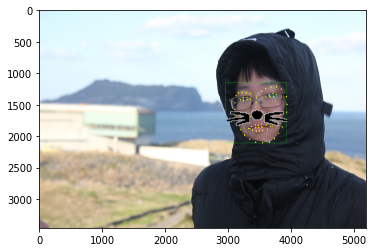

In [40]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# <span style=""> 6. 최종 결과 이미지 출력

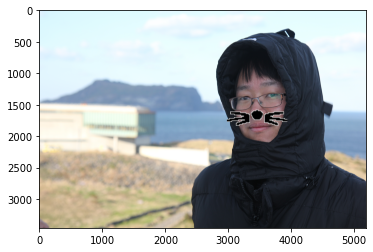

In [41]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
# img_bgr 사용
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# <span style=""> 7. 회고
    
    어플에서나 해 보던 것을 직접 만들고 적용해 보는 즐거운 과정이었음.
    이미지가 고해상도여서 랜드마크 이미지가 출력되지 않아 상당히 애를 먹었었음
    검색과 질문을 통해 방향을 찾아나아 가며 소통 및 많은 배움의 과정이 있었음
    
    추가로 다양한 각도 및 측면사진을 적용해 보려 시도하였으나 얼굴 검출이 되지 않았음
    인식률이 상당히 떨어짐을 알 수 있었고 시간관계상 과제 제출을 하나
    추후에 인식 가능한 사진을 구해와 적용을 해 볼 생각임
    
    실제 시중에 쓰이는 스티커 앱정도의 퀄리티가 나오려면 인식 및 정확도가 높아야 할 것으로 생각됨.